# For sanity checking output of diurnal analysis results

In [38]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import ephem
from datetime import datetime, time, timedelta
from scipy import optimize
from mpl_toolkits.basemap import Basemap
from sys import getsizeof

import diurnal_config

# from diurnal_utils import *
%run diurnal_utils.py
%run model_by_model_analysis_helper.py
from fetch_model_helper import *

In [39]:
rel_data_dir = '/export/data1/cchristo/'

# raw output
input_data_dir_cm5 = rel_data_dir  + 'diurnal_analysis_results/CMIP5_bin_pt2_hr_round/' #GFDL-ESM2M/'
input_data_dir_cm6  = rel_data_dir + 'diurnal_analysis_results/CMIP6_bin_pt2_hr_round/' #GFDL-ESM4/'
input_data_dir_gpm = rel_data_dir + 'diurnal_analysis_results/GPM_bin_pt2_hr_15_yr/'
# regridded data
input_data_dir_cm5_regridded = rel_data_dir  + 'diurnal_analysis_results/CMIP5_regridded/grid1/' #GFDL-ESM2M/'
input_data_dir_cm6_regridded  = rel_data_dir + 'diurnal_analysis_results/CMIP6_regridded/grid1/' #GFDL-ESM4/'

In [40]:
rel_data_dir = '/export/data1/cchristo/'
# get all available model names
rel_cmip6_path= rel_data_dir + 'CMIP6_clouds/clt_3hr_historical/'
rel_cmip5_path = rel_data_dir + 'CMIP5_precip/pr_3hr_historical/'
unique_cmip6_models = get_unique_models(rel_cmip6_path)
unique_cmip5_models = get_unique_models(rel_cmip5_path)

In [21]:
### CMIP
model_name = "IPSL-CM6A-LR"
ds_i = xr.open_dataset(input_data_dir_cm6 + model_name + '/' + '1985-01_2006-01_precip.nc')
### GPM

ds_i_gpm = xr.open_dataset(input_data_dir_gpm + '2000-06_2016-06_precip.nc')

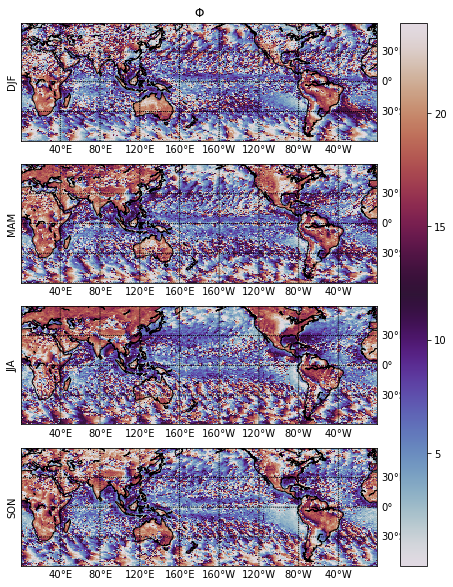

In [25]:
# ds_i_gpm
make_four_panel(ds_i_gpm['phase_season'])

In [16]:
# ds_i.input_dataset_paths
len(unique_cmip6_models)

28

In [6]:
print('lat, lon spacing', 
      np.median(np.diff(ds_i.lat)),
      np.median(np.diff(ds_i.lon)))

lat, lon spacing 1.2676048 2.5


In [7]:
ds_i

<xarray.Dataset>
Dimensions:           (lat: 95, lon: 144, season: 4)
Coordinates:
  * season            (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon               (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat               (lat) float32 -59.577465 -58.30986 ... 58.30986 59.577465
Data variables:
    mu_season         (season, lat, lon) float64 ...
    sigma_season      (season, lat, lon) float64 ...
    ampl_season       (season, lat, lon) float64 ...
    phase_season      (season, lat, lon) float64 ...
    ampl_cov_season   (season, lat, lon) float64 ...
    phase_cov_season  (season, lat, lon) float64 ...
Attributes:
    input_dataset_paths:  /export/data1/cchristo/CMIP6_precip/pr_3hr_historic...

GFDL-CM3
lat, lon spacing 2.0 2.5
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_1970010100-1974123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_1975010100-1979123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_1980010100-1984123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_1985010100-1989123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_1990010100-1994123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_1995010100-1999123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_2000010100-2004123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-CM3_historical_r1i1p1_2005010100-2005123123.nc', '/export/data1/cchristo/CMIP5_precip/

<Figure size 864x504 with 0 Axes>

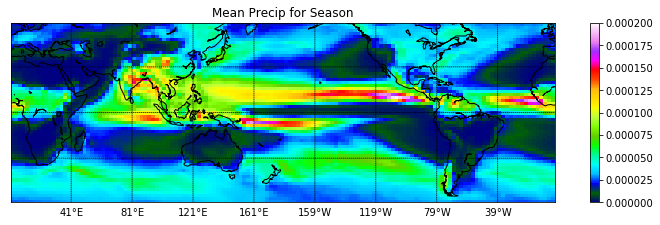

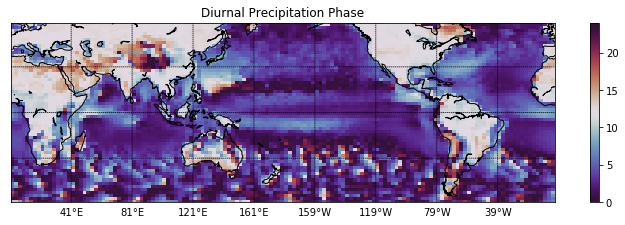

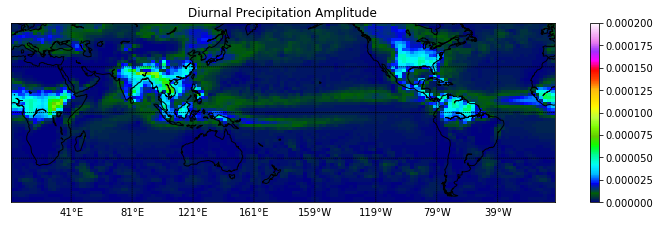

MIROC-ESM-CHEM
lat, lon spacing 2.790584259981273 2.8125
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM-CHEM_historical_r1i1p1_196001010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM-CHEM_historical_r1i1p1_198001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM-CHEM_historical_r1i1p1_200001010130-200512312230.nc']
JJA


<Figure size 864x504 with 0 Axes>

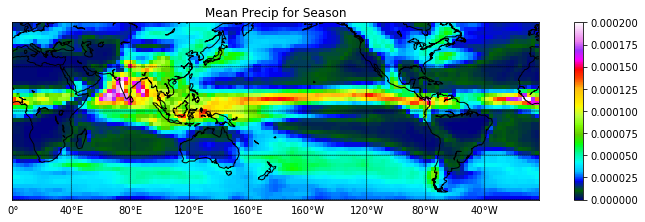

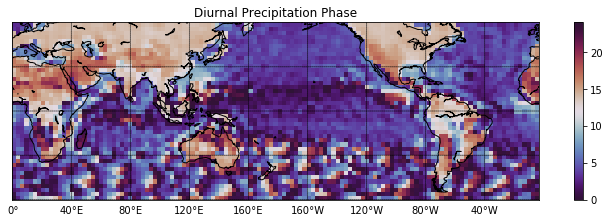

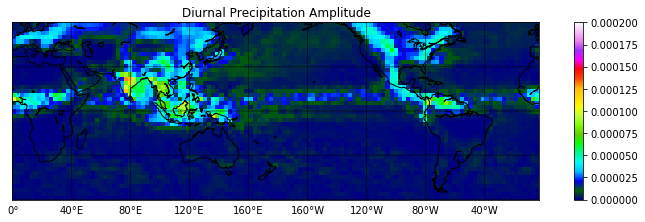

NorESM1-M
lat, lon spacing 1.8947368421052602 2.5
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r1i1p1_197001010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r1i1p1_198001010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r1i1p1_199001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r1i1p1_200001010130-200512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r2i1p1_197001010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r2i1p1_198001010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r2i1p1_199001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_NorESM1-M_historical_r2i1p1_200001010130

<Figure size 864x504 with 0 Axes>

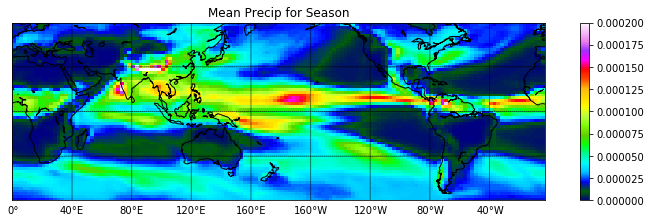

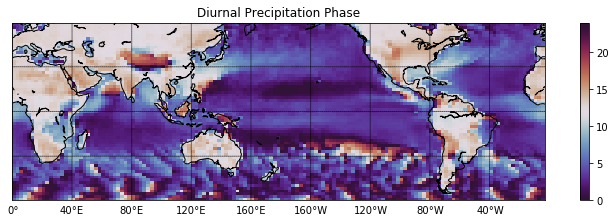

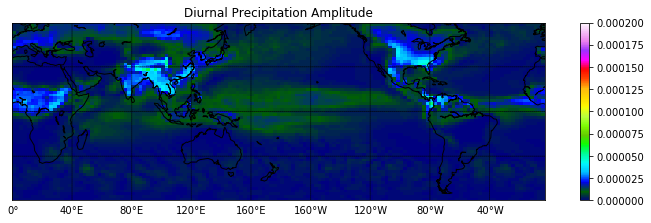

GFDL-ESM2M
lat, lon spacing 2.0224719101123583 2.5
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_1966010100-1970123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_1971010100-1975123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_1976010100-1980123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_1981010100-1985123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_1986010100-1990123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_1991010100-1995123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_1996010100-2000123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2M_historical_r1i1p1_2001010100-2005123123.nc']
JJA


<Figure size 864x504 with 0 Axes>

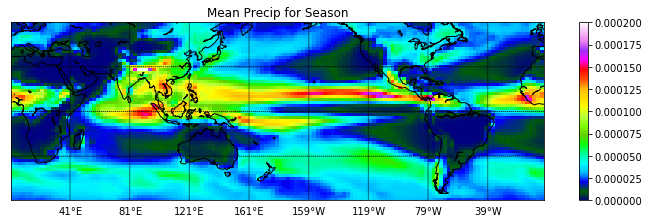

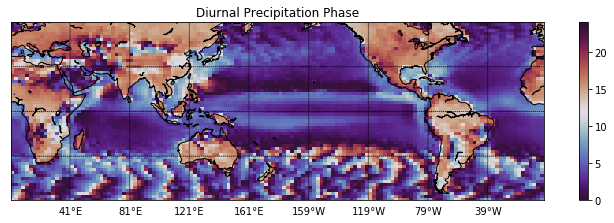

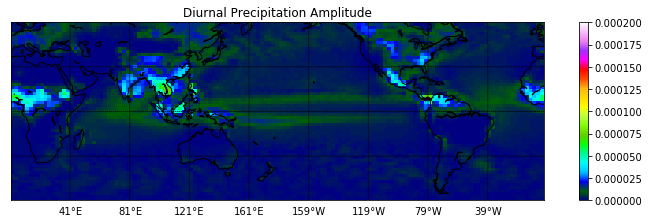

FGOALS-s2
lat, lon spacing 1.6589622497558594 2.8125
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197001010130-197012312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197101010130-197112312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197201010130-197212312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197301010130-197312312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197401010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197501010130-197512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197601010130-197612312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-s2_historical_r1i1p1_197701010

<Figure size 864x504 with 0 Axes>

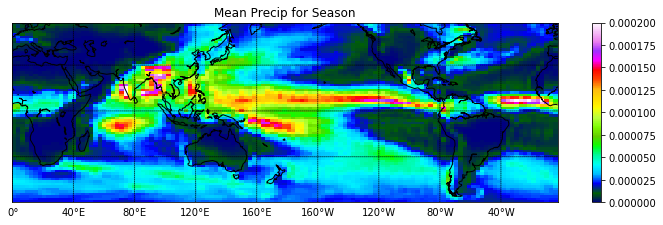

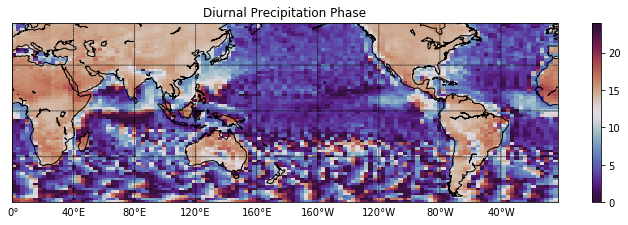

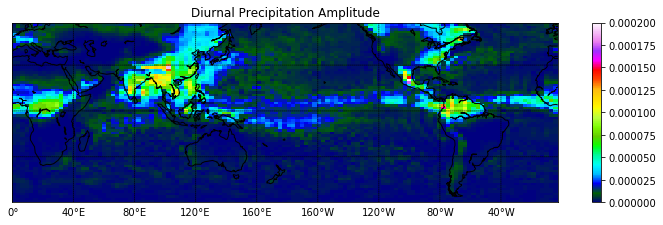

ACCESS1-3
lat, lon spacing 1.25 1.875
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_197001010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_197501010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_198001010130-198412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_198501010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_199001010130-199412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_199501010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_200001010130-200412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-3_historical_r1i1p1_200501010130-20051231223

<Figure size 864x504 with 0 Axes>

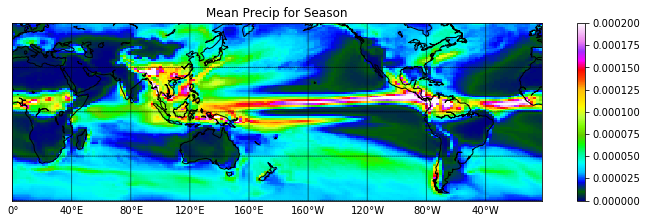

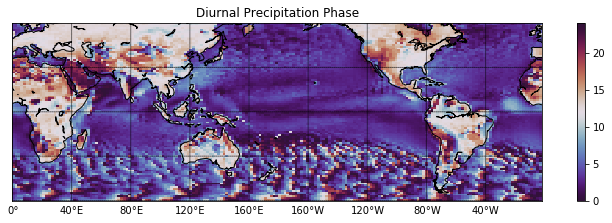

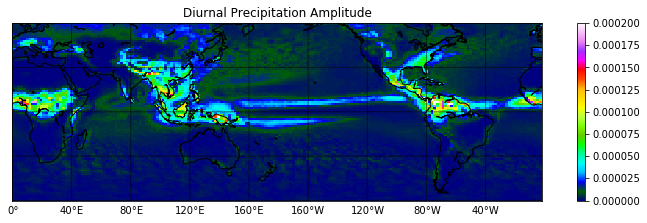

GISS-E2-R
lat, lon spacing 2.0 2.5
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-R_historical_r6i1p1_197001010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-R_historical_r6i1p1_198001010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-R_historical_r6i1p1_199001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-R_historical_r6i1p1_200001010130-200512312230.nc']
JJA


<Figure size 864x504 with 0 Axes>

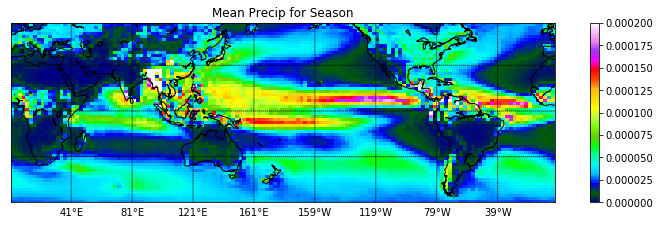

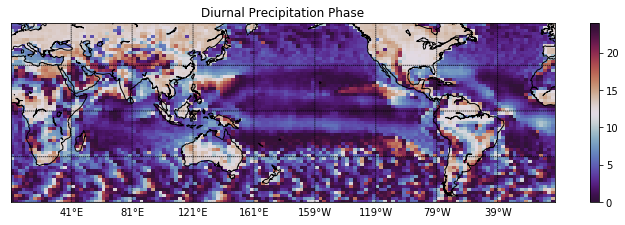

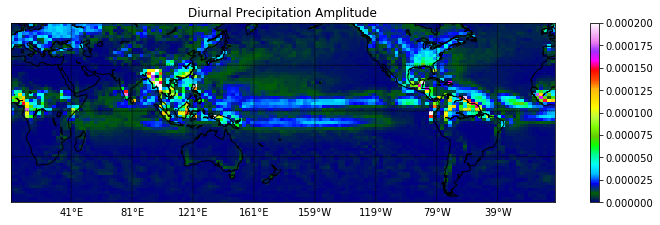

HadGEM2-ES
lat, lon spacing 1.25 1.875
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_197001010130-197412302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_197501010130-197912302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_198001010130-198412302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_198501010130-198912302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_199001010130-199412302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_199501010130-199912302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_200001010130-200412302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_HadGEM2-ES_historical_r2i1p1_200501010130-20

<Figure size 864x504 with 0 Axes>

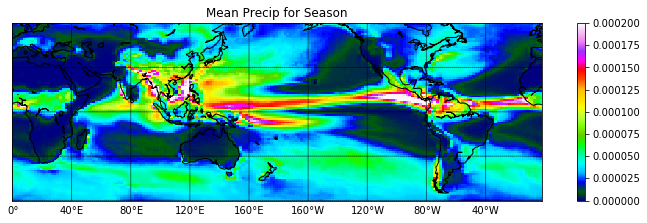

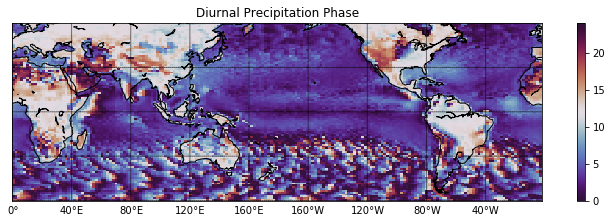

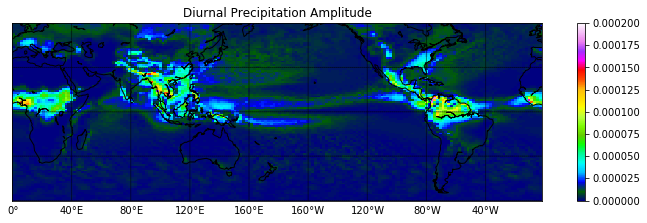

GISS-E2-H
lat, lon spacing 2.0 2.5
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-H_historical_r6i1p1_197001010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-H_historical_r6i1p1_198001010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-H_historical_r6i1p1_199001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GISS-E2-H_historical_r6i1p1_200001010130-200512312230.nc']
JJA


<Figure size 864x504 with 0 Axes>

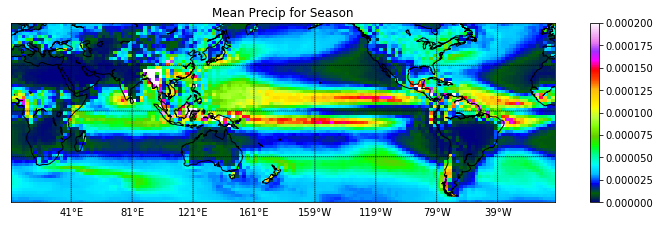

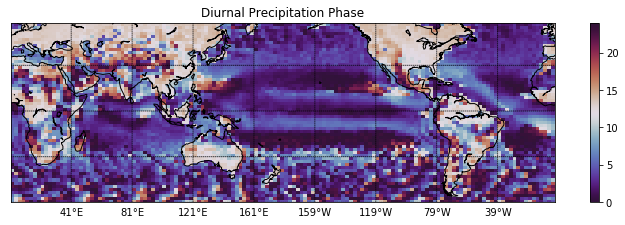

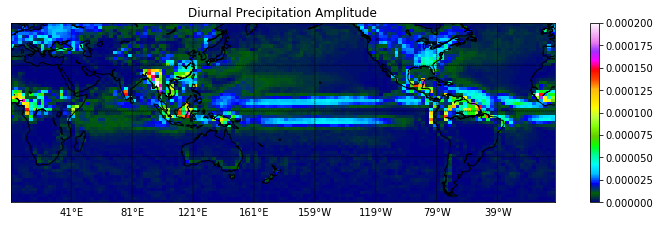

MRI-ESM1
lat, lon spacing 1.1214899999999997 1.125
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197001010130-197012312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197101010130-197112312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197201010130-197212312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197301010130-197312312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197401010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197501010130-197512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197601010130-197612312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-ESM1_historical_r1i1p1_197701010130-197712

<Figure size 864x504 with 0 Axes>

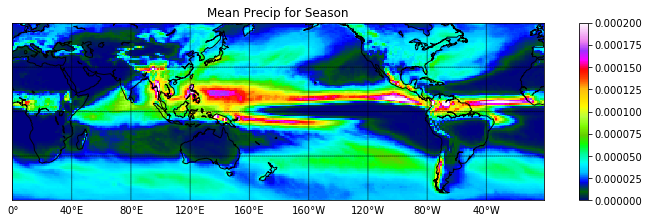

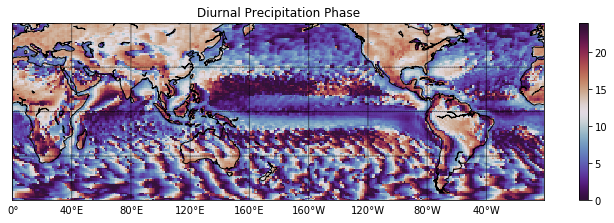

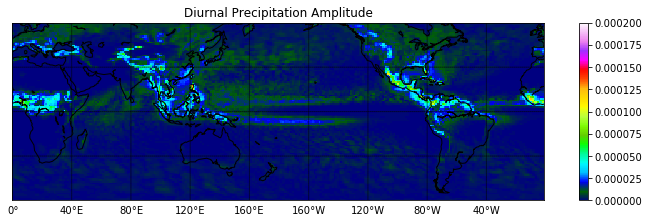

FGOALS-g2
lat, lon spacing 2.790586471557617 2.8125
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_197001010130-197012312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_197101010130-197112312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_197201010130-197212312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_197301010130-197312312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_197401010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_197501010130-197512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_197601010130-197612312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_FGOALS-g2_historical_r1i1p1_1977010101

<Figure size 864x504 with 0 Axes>

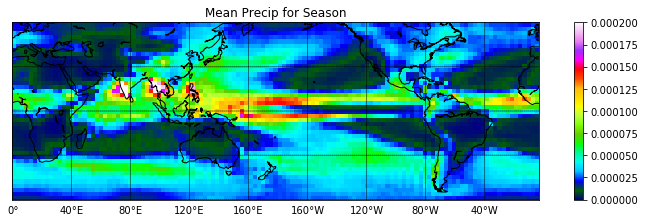

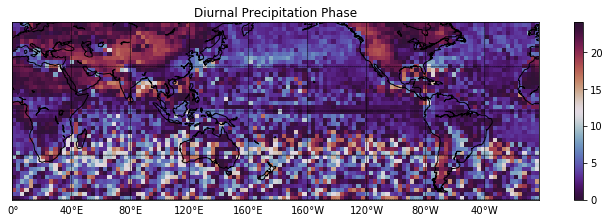

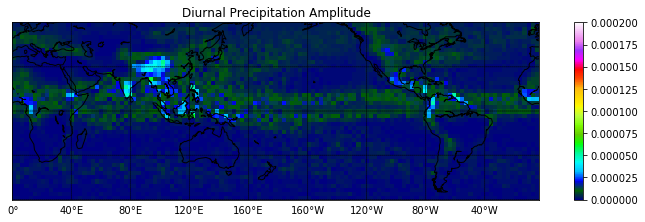

MIROC4h
lat, lon spacing 0.5616215579139414 0.5625
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197001010130-197006302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197007010130-197012312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197101010130-197106302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197107010130-197112312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197201010130-197206302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197207010130-197212312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197301010130-197306302230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC4h_historical_r1i1p1_197307010130-197312312230.n

<Figure size 864x504 with 0 Axes>

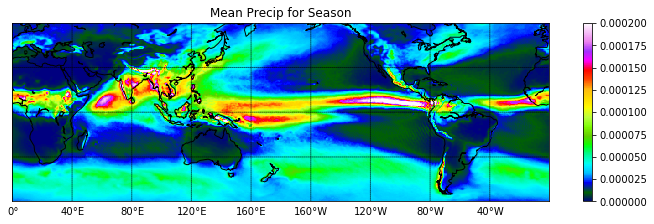

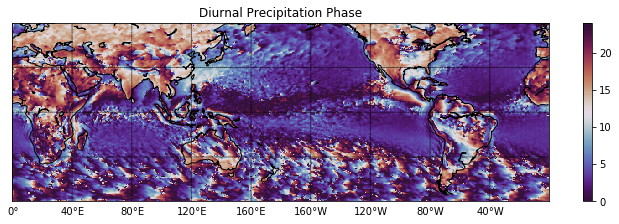

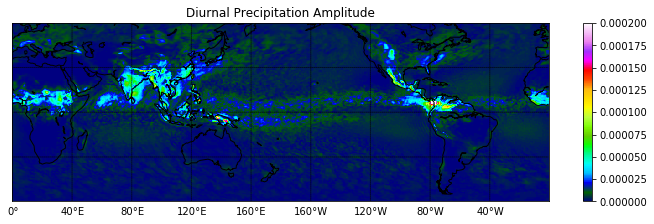

GFDL-ESM2G
lat, lon spacing 2.0224719101123583 2.5
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_1966010100-1970123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_1971010100-1975123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_1976010100-1980123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_1981010100-1985123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_1986010100-1990123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_1991010100-1995123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_1996010100-2000123123.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_GFDL-ESM2G_historical_r1i1p1_2001010100-2005123123.nc']
JJA


<Figure size 864x504 with 0 Axes>

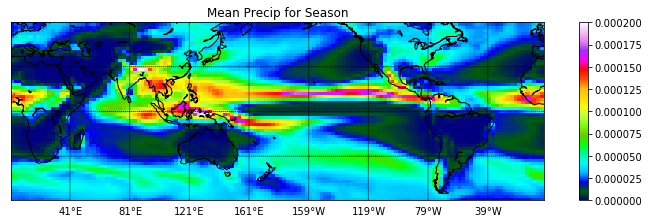

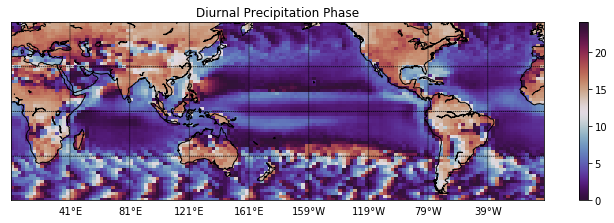

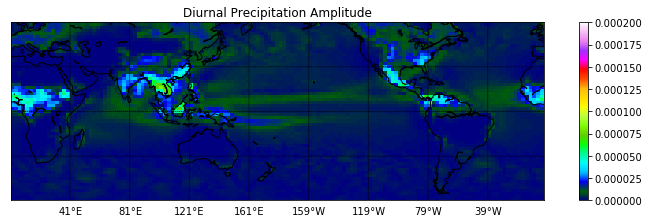

ACCESS1-0
lat, lon spacing 1.25 1.875
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_197001010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_197501010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_198001010130-198412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_198501010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_199001010130-199412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_199501010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_200001010130-200412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_ACCESS1-0_historical_r1i1p1_200501010130-20051231223

<Figure size 864x504 with 0 Axes>

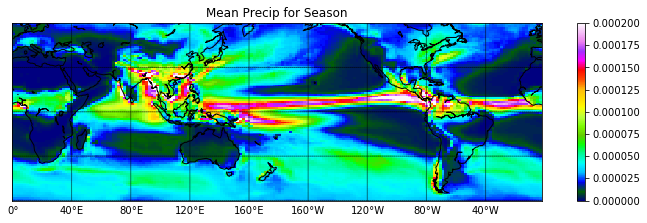

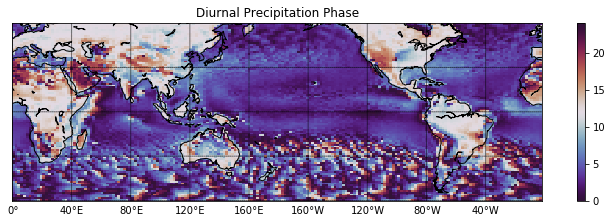

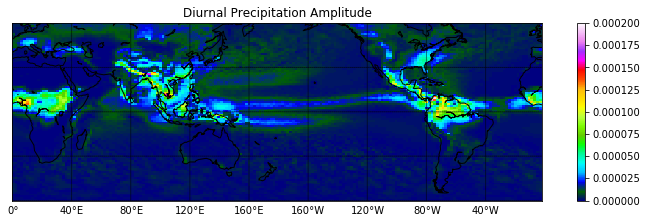

MRI-CGCM3
lat, lon spacing 1.1214899999999997 1.125
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_197001010130-197012312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_197101010130-197112312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_197201010130-197212312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_197301010130-197312312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_197401010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_197501010130-197512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_197601010130-197612312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MRI-CGCM3_historical_r1i1p1_1977010101

<Figure size 864x504 with 0 Axes>

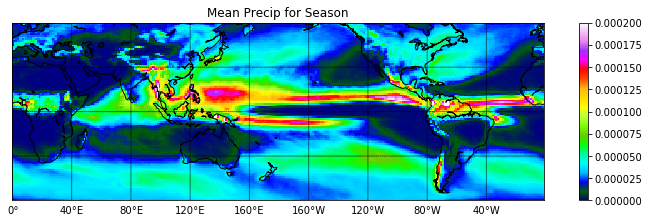

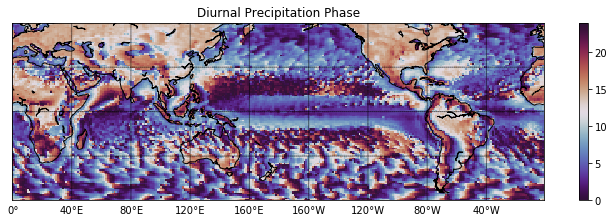

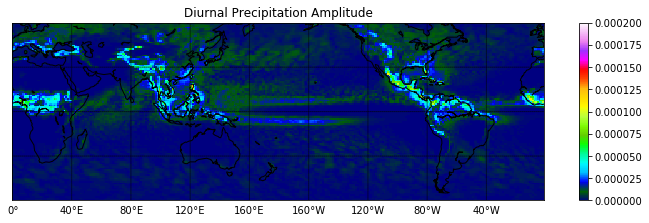

inmcm4
lat, lon spacing 1.5 2.0
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1971010101-1971123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1972010101-1972123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1973010101-1973123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1974010101-1974123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1975010101-1975123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1976010101-1976123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1977010101-1977123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_inmcm4_historical_r1i1p1_1978010101-1978123122.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/

<Figure size 864x504 with 0 Axes>

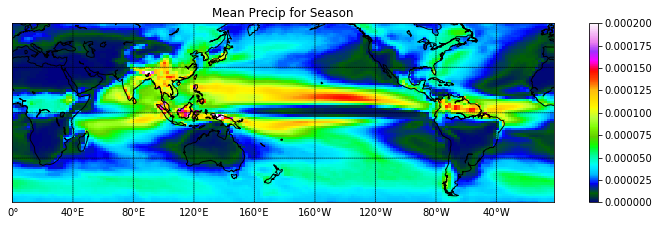

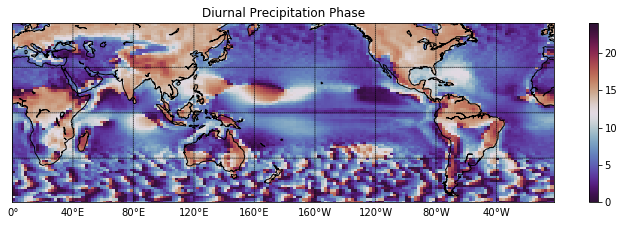

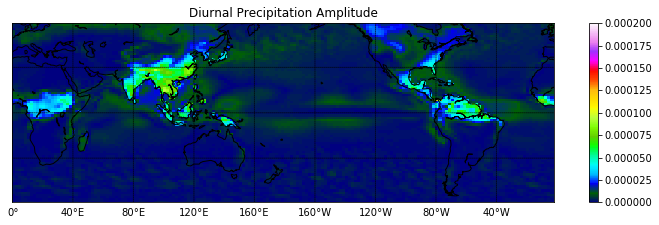

CNRM-CM5
lat, lon spacing 1.4007644653320312 1.40625
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_196501010300-197001010000.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_197001010300-197501010000.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_197501010300-198001010000.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_198001010300-198501010000.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_198501010300-199001010000.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_199001010300-199501010000.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_199501010300-200001010000.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CNRM-CM5_historical_r1i1p1_200001010300-2005

<Figure size 864x504 with 0 Axes>

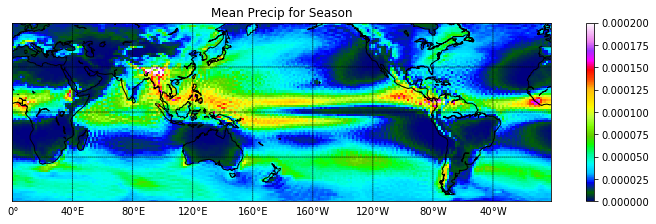

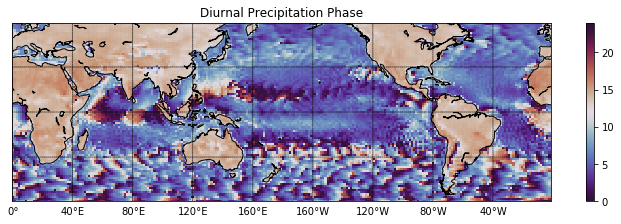

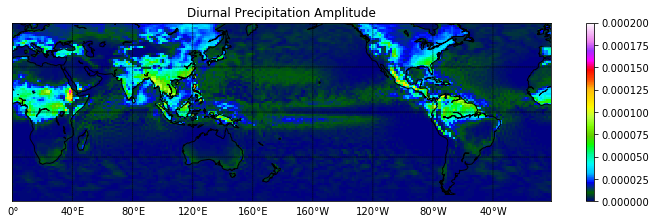

IPSL-CM5A-LR
lat, lon spacing 1.8947372436523438 3.75
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_195001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-LR_historical_r1i1p1_200001010130-200512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-LR_historical_r2i1p1_195001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-LR_historical_r2i1p1_200001010130-200512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-LR_historical_r6i1p1_195001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-LR_historical_r6i1p1_200001010130-200512312230.nc']
JJA


<Figure size 864x504 with 0 Axes>

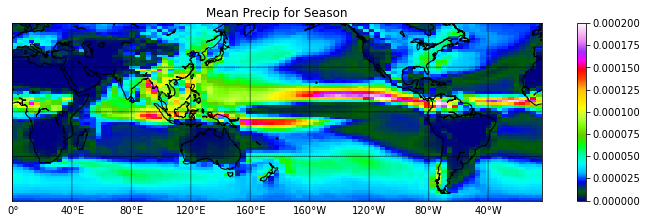

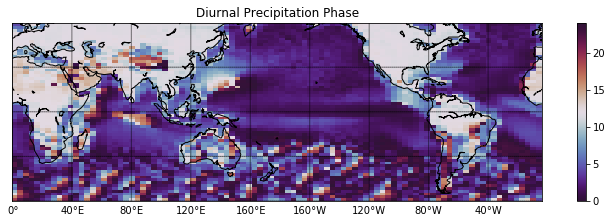

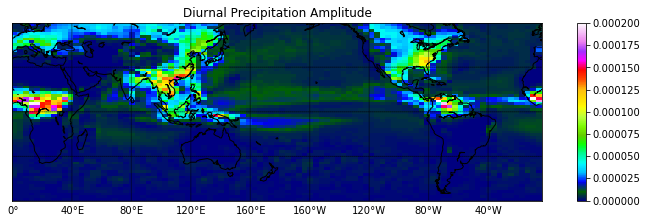

MIROC-ESM
lat, lon spacing 2.790584259981273 2.8125
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM_historical_r1i1p1_196001010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM_historical_r1i1p1_198001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM_historical_r1i1p1_200001010130-200512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM_historical_r2i1p1_196001010130-197912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM_historical_r2i1p1_198001010130-199912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC-ESM_historical_r2i1p1_200001010130-200512312230.nc']
JJA


<Figure size 864x504 with 0 Axes>

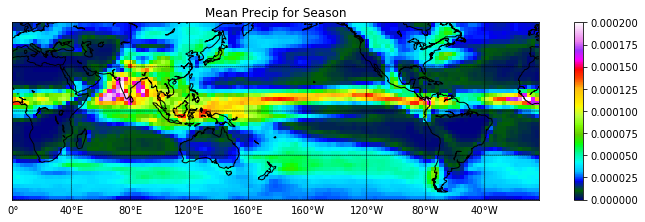

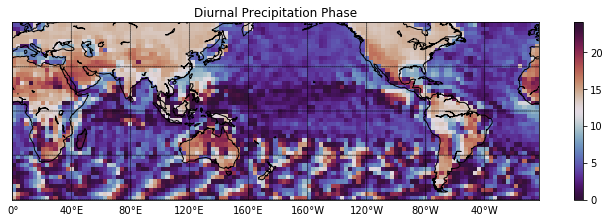

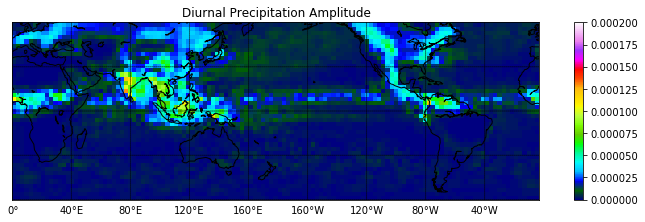

CMCC-CM
lat, lon spacing 0.748438594503039 0.75
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197001010130-197012312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197101010130-197112312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197201010130-197212312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197301010130-197312312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197401010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197501010130-197512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197601010130-197612312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_CMCC-CM_historical_r1i1p1_197701010130-197712312230.nc',

<Figure size 864x504 with 0 Axes>

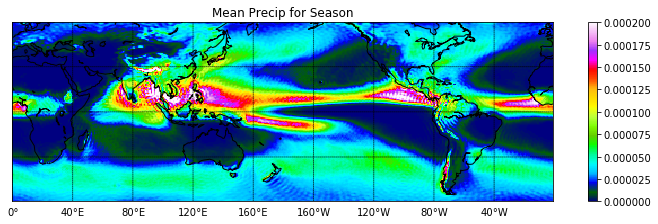

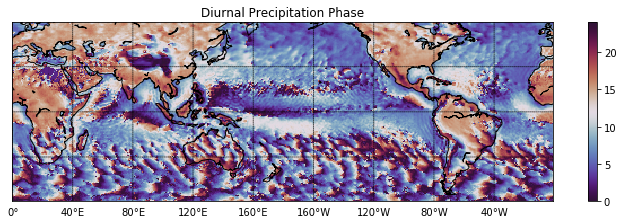

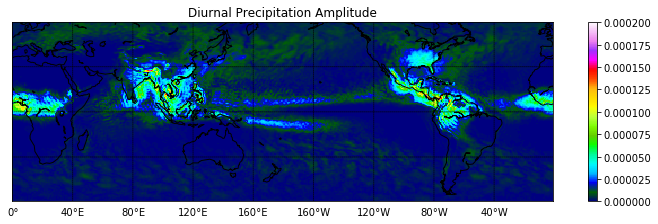

IPSL-CM5A-MR
lat, lon spacing 1.2676048278808594 2.5
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-MR_historical_r1i1p1_197001010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-MR_historical_r1i1p1_199001010130-200512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-MR_historical_r2i1p1_197001010130-198912312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_IPSL-CM5A-MR_historical_r2i1p1_199001010130-200512312230.nc']
JJA


<Figure size 864x504 with 0 Axes>

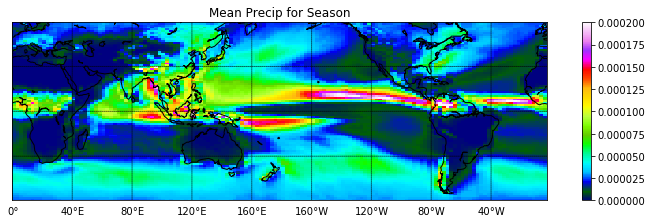

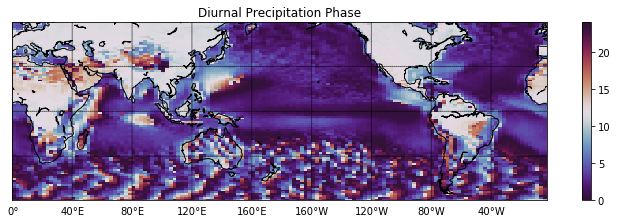

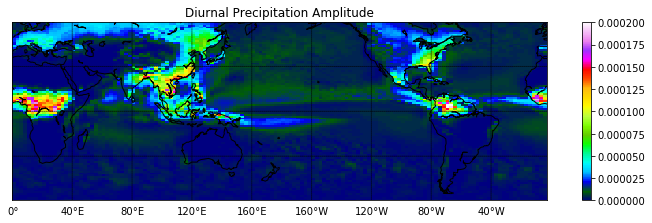

MIROC5
lat, lon spacing 1.4007642344911346 1.40625
['/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197001010130-197012312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197101010130-197112312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197201010130-197212312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197301010130-197312312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197401010130-197412312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197501010130-197512312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197601010130-197612312230.nc', '/export/data1/cchristo/CMIP5_precip/pr_3hr_historical/pr_3hr_MIROC5_historical_r1i1p1_197701010130-197712312230.nc', '/ex

<Figure size 864x504 with 0 Axes>

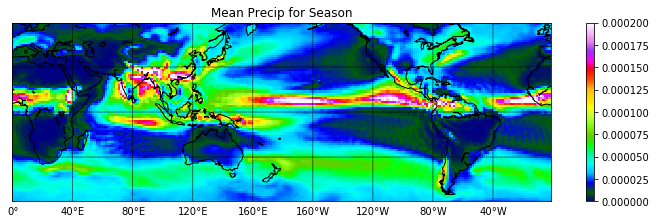

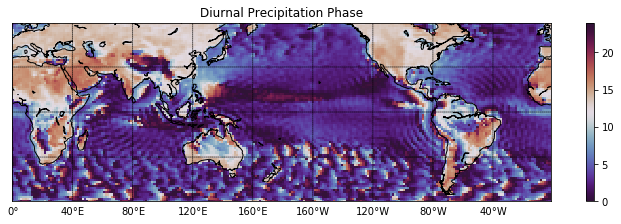

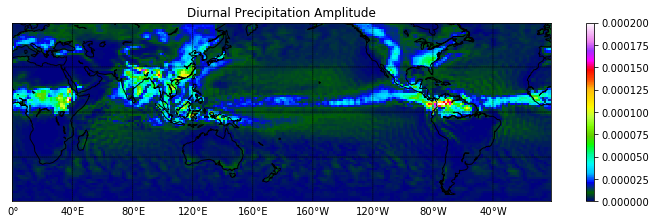

In [41]:
season_i = 0
for model_name in unique_cmip5_models: 
# for model_name in [model_name]:
    print(model_name)
    try:
        ds_i = xr.open_dataset(input_data_dir_cm5 + model_name + '/' + '1985-01_2006-01_precip.nc')
    except:
        print('Could not open: ', model_name)
    print('lat, lon spacing', 
          np.median(np.diff(ds_i.lat)),
          np.median(np.diff(ds_i.lon)))
    print(ds_i.input_dataset_paths)
#     print(ds_i.input_dataset_paths)
    plt.figure(figsize = (12,7))
    season_i = 1
    print(ds_i.isel(season = season_i).season.item())
    ds_i_season_mu = ds_i['mu_season'].isel(season = season_i)
    ds_i_season_phase = ds_i['phase_season'].isel(season = season_i)
    ds_i_season_ampl = ds_i['ampl_season'].isel(season = season_i)
    # ds_i['phase_season'].isel(season = season_i).plot.hist(bins = 50)
    ds_i_sigma = ds_i[['phase_cov_season', 'ampl_cov_season']].apply(np.sqrt)




    make_single_plot(ds_i_season_mu, 
                     title = r'Mean Precip for Season',
                     cmap = plt.get_cmap('gist_ncar'),
                     vmin = 0, vmax = 0.0002)


    make_single_plot(ds_i_season_phase, 
                     title = r'Diurnal Precipitation Phase',
                     cmap = plt.get_cmap('twilight_shifted'),
                     vmin = 0, vmax = 24)
    # make_single_plot(ds_i_sigma.isel(season = season_i)['phase_cov_season'], 
    #                  title = r'Diurnal Precipitation Phase Cov',
    #                  cmap = plt.get_cmap('Reds'),
    #                  vmin = 0, vmax = 1.5)

    make_single_plot(ds_i_season_ampl, 
                     title = r'Diurnal Precipitation Amplitude',
                     cmap = plt.get_cmap('gist_ncar'),
                     vmin = 0, vmax = 0.0002)
    plt.show()

# abs_ampl = ds_i_season_ampl.to_dataset().apply(np.abs)['ampl_season']
# rel_error_ampl = (ds_i_sigma.isel(season = season_i)['ampl_cov_season']/abs_ampl)

# make_single_plot(rel_error_ampl, 
#                  title = r'Diurnal Precipitation Amplitude Cov',
#                  cmap = plt.get_cmap('Reds'),
#                  vmin = 0, vmax = 0.2)

In [144]:
ds_i_season_ampl.min()

<xarray.DataArray 'ampl_season' ()>
array(2.9250248e-06)
Coordinates:
    season   <U3 'DJF'

(0, 0.05)

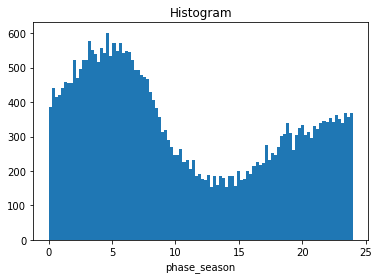

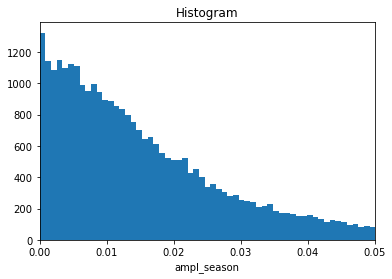

In [147]:
_ = ds_i_season_phase.plot.hist(bins = 100)
# plt.xlim([0,6])
plt.figure()
_ = ds_i_season_ampl.plot.hist(bins = 1000)
plt.xlim([0, 0.05])

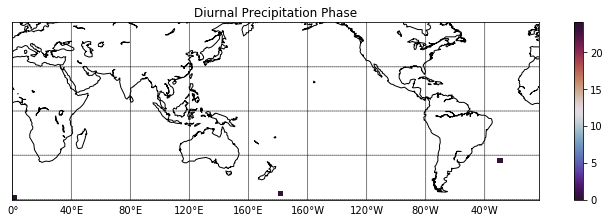

In [187]:
round_pres = 1
make_single_plot(ds_i_season.round(round_pres).where(ds_i_season.round(round_pres) == 24), 
                 title = r'Diurnal Precipitation Phase',
                 cmap = plt.get_cmap('twilight_shifted'),
                 vmin = 0, vmax = 24)

In [83]:
ds_i_year_mean = xr.apply_ufunc(phase_circmean, ds_i['phase_season'], 
#                                    kwargs = {'low' : 0.0, 'high' : 24.0},
                                   input_core_dims=[["season"]], 
                                   vectorize = True,
                                   dask = 'allowed')

In [211]:
# ds_i
# ds_i_season_ampl.plot.hist(bins = 100)

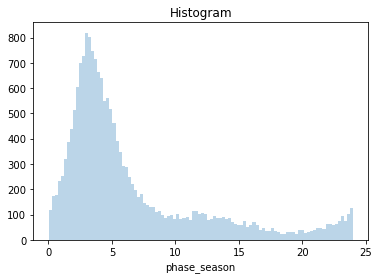

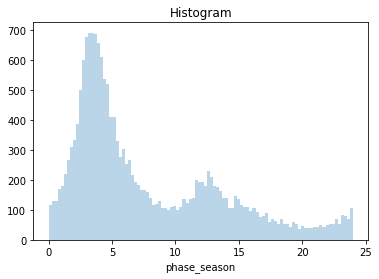

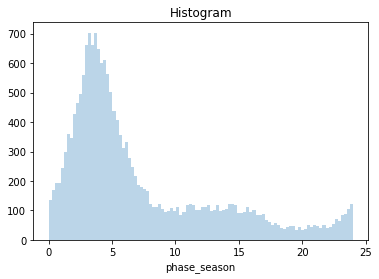

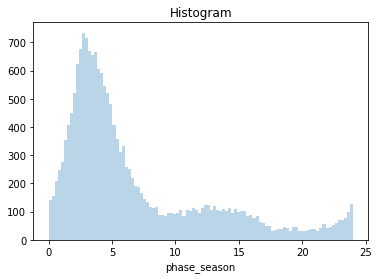

In [207]:
for seas_i in ds_i.season:
    plt.figure()
    _ = ds_i.sel(season = seas_i)['phase_season'].plot.hist(bins = 100, alpha = 0.3)

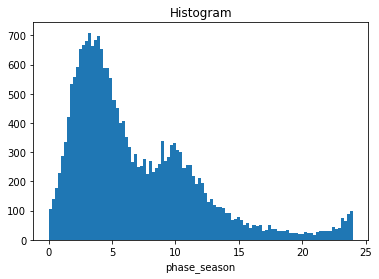

In [89]:
_ = ds_i_year_mean.plot.hist(bins = 100)
# make_single_plot(ds_i_year_mean, 
#                  title = r'Diurnal Precipitation Phase',
#                  cmap = plt.get_cmap('twilight_shifted'),
#                  vmin = 0, vmax = 24)